 # گسسته سازی داده ها برای رگرسیون لجستیک
 # H.KianAra

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive


drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/DataSets/bank-full.csv', delimiter=';')

df.y = df.y.replace({'yes':1, 'no': 0})

conditions = [df['age'] <20, 
              (df['age']>=20) & (df['age']<30), 
              (df['age']>=30) & (df['age']<40),
              (df['age']>=40) & (df['age']<50),
              (df['age']>=50) & (df['age']<60),
              (df['age']>=60) & (df['age']<70),
              (df['age']>=70) & (df['age']<80),
              df['age']>=80]
agebins = [1, 2, 3, 4, 5, 6, 7, 8]
df['age'] = np.select(conditions, agebins)

jobary = df['job'].unique()
num = 1
for i in jobary:
  df.job = df.job.replace({i : num})
  num += 1

df.marital = df.marital.replace({'married' : 1, 'single' : 0, 'divorced' : 2})

eduary = df['education'].unique()
num = 1
for i in eduary:
  df.education = df.education.replace({i : num})
  num += 1

df.default = df.default.replace({'yes':1, 'no': 0})
df.housing = df.housing.replace({'yes':1, 'no': 0})
df.loan = df.loan.replace({'yes':1, 'no': 0})
df.contact = df.contact.replace({'cellular': 2, 'unknown': 1, 'telephone': 0})

month_conditions = [df['month'] == 'jan', df['month'] == 'feb',
                    df['month'] == 'mar', df['month'] == 'apr',
                    df['month'] == 'may', df['month'] == 'jun',
                    df['month'] == 'jul', df['month'] == 'aug',
                    df['month'] == 'sep', df['month'] == 'oct',
                    df['month'] == 'nov', df['month'] == 'dec']

month_bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
df['month'] = np.select(month_conditions, month_bins)

poutcome = df['poutcome'].unique()
num = 1
for i in poutcome:
  df.poutcome = df.poutcome.replace({i : num})
  num += 1


df.head(2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,5,1,1,1,0,2143,1,0,1,5,5,261,1,-1,0,1,0
1,4,2,0,2,0,29,1,0,1,5,5,151,1,-1,0,1,0


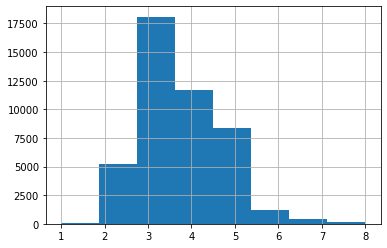

In [ ]:
df['age'].hist(bins=8)

0    39922
1     5289
Name: y, dtype: int64 



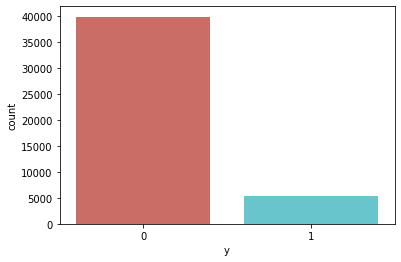

In [ ]:
print(df['y'].value_counts(), '\n')
sns.countplot(x = 'y', data=df, palette='hls')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


x = df.loc[:, df.columns != 'y']
y = df.iloc[:, -1]

overSampling = SMOTE()
over_x, over_y = overSampling.fit_sample(x, y)

X_scaled = preprocessing.StandardScaler().fit_transform(over_x)

"""
rf = RandomForestClassifier().fit(X_scaled, over_y)
rffi = rf.feature_importances_
sorted = np.argsort(rffi)
lbl = x.columns[sorted]
plt.barh(range(x.shape[1]), rffi[sorted], tick_label=lbl)
plt.title('Random Forest Feature Importances')
plt.show()

new_df = X_scaled[:,sorted[11:]]


pca = PCA(n_components=5)
new_df = pca.fit_transform(X_scaled)
var_pca = pca.explained_variance_ratio_
sum_var = 0
for i in var_pca:
  sum_var += i
print('\nSave Var info : %.3f' % sum_var)
"""
X_train, X_test, y_train, y_test = train_test_split(new_df, over_y, test_size=0.4, random_state=0)

"""
Log_model = LogisticRegression().fit(X_train, y_train)
y_hat = Log_model.predict(X_test)
print('Logestic Accuracy : %.3f\n' % Log_model.score(X_test, y_test))
print('Logestic Confusion Matrix : \n ', confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat))

D3_model = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_hat = D3_model.predict(X_test)
print('Decision Tree Accuracy : %.3f\n' % Log_model.score(X_test, y_test))
print('Decision Tree Confusion Matrix : \n', confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat))

svm_model = SVC().fit(X_train, y_train)
y_hat = svm_model.predict(X_test)
print('SVM Accuracy : %.3f\n' % svm_model.score(X_test, y_test))
print('SVM Confusion Matrix : \n', confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat))

nb_model = GaussianNB().fit(X_train, y_train)
y_hat = nb_model.predict(X_test)
print('Naive Bayes Accuracy : %.3f\n' % nb_model.score(X_test, y_test))
print('Naive Bayes Confusion Matrix : \n', confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat))
"""

forest_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = forest_model.predict(X_test)
print('Random Forest Accuracy : %.3f\n' % forest_model.score(X_test, y_test))
print('Random Forest Confusion Matrix : \n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

"""
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=20000, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred_Bagging = bag_clf.predict(X_test)
print('Bagging Accuracy : %.3f\n' % bag_clf.score(X_test, y_test))
print('Bagging Confusion Matrix : \n', confusion_matrix(y_test, y_pred_Bagging))
print(classification_report(y_test, y_pred_Bagging))
"""

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Random Forest Accuracy : 0.880

Random Forest Confusion Matrix : 
 [[13439  2400]
 [ 1438 14661]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.88     15839
           1       0.86      0.91      0.88     16099

    accuracy                           0.88     31938
   macro avg       0.88      0.88      0.88     31938
weighted avg       0.88      0.88      0.88     31938



"\nfrom sklearn.ensemble import BaggingClassifier\nfrom sklearn.tree import DecisionTreeClassifier\n\nbag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,\n                            max_samples=20000, bootstrap=True, n_jobs=-1)\nbag_clf.fit(X_train, y_train)\ny_pred_Bagging = bag_clf.predict(X_test)\nprint('Bagging Accuracy : %.3f\n' % bag_clf.score(X_test, y_test))\nprint('Bagging Confusion Matrix : \n', confusion_matrix(y_test, y_pred_Bagging))\nprint(classification_report(y_test, y_pred_Bagging))\n"

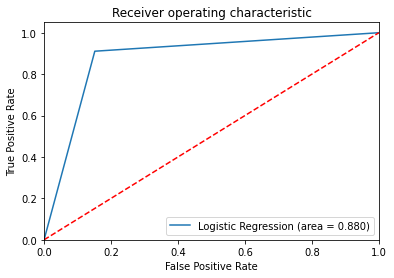

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

RocCurve = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % RocCurve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()